In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
data_url = "./load_boston.csv"
data = pd.read_csv(data_url, sep="\\s+", header=None)
data.head()
dataset=data.copy()
dataset.drop([13], axis=1, inplace=True)
feature_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT']
dataset.columns=feature_names
dataset.head()
X=dataset
y=data[13]
y
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33, random_state=42)
X_train
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [8]:

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [9]:
regression=Ridge()
regression

Ridge()

In [10]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(regression,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [11]:
ridgecv.best_params_

{'alpha': 5}

In [12]:
ridgecv.best_score_

-25.107805404491778

In [13]:
ridge_prediction=ridgecv.predict(X_test)

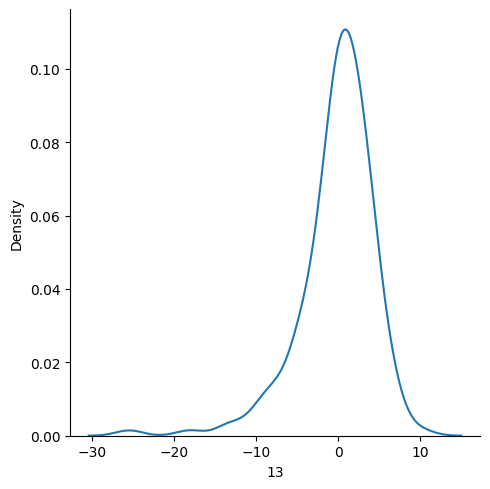

In [14]:
import seaborn as sns
sns.displot(ridge_prediction-y_test,kind='kde')

In [16]:
from sklearn.metrics import r2_score
score=r2_score(ridge_prediction,y_test)
score

0.6588722959522685